# Amplitude Change Detection - ACD

Look for change detection by using the changes in the amplitude/backscatter of a pair of images at different dates.
Examples: 
* new building: before low backscatter, after high backscatter
* Flooding: decrease of backscatter because of very low backscatter of water bodies
* Burned Area: depending of the vegetation characteristics, it could be are increase or decrease of backscatter

# Changes example in Amazonas - Brasil

Time series of images available in https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/ for fire monitoring.

Every geotiff file has three bands:
* Backscatter at date 1
* Backscatter at date 2
* Coherence date 1 - date 2 (will be explained later?)

In this kind of vegetation, it is possible to see a decrease of backscatter of the burned area with respect to the not burned.
In the examples, the rivers have a very low backscatter. The areas without vegetation has a lower backscatter than the vegetated ones.

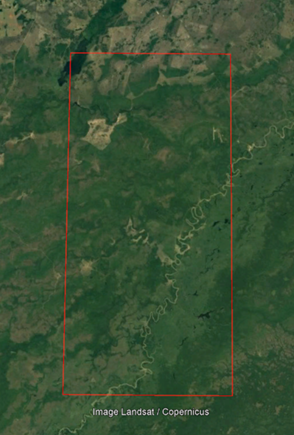

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from helpers import *

/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200621T091832_20200703T091832.tif
/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200808T091834_20200820T091835.tif


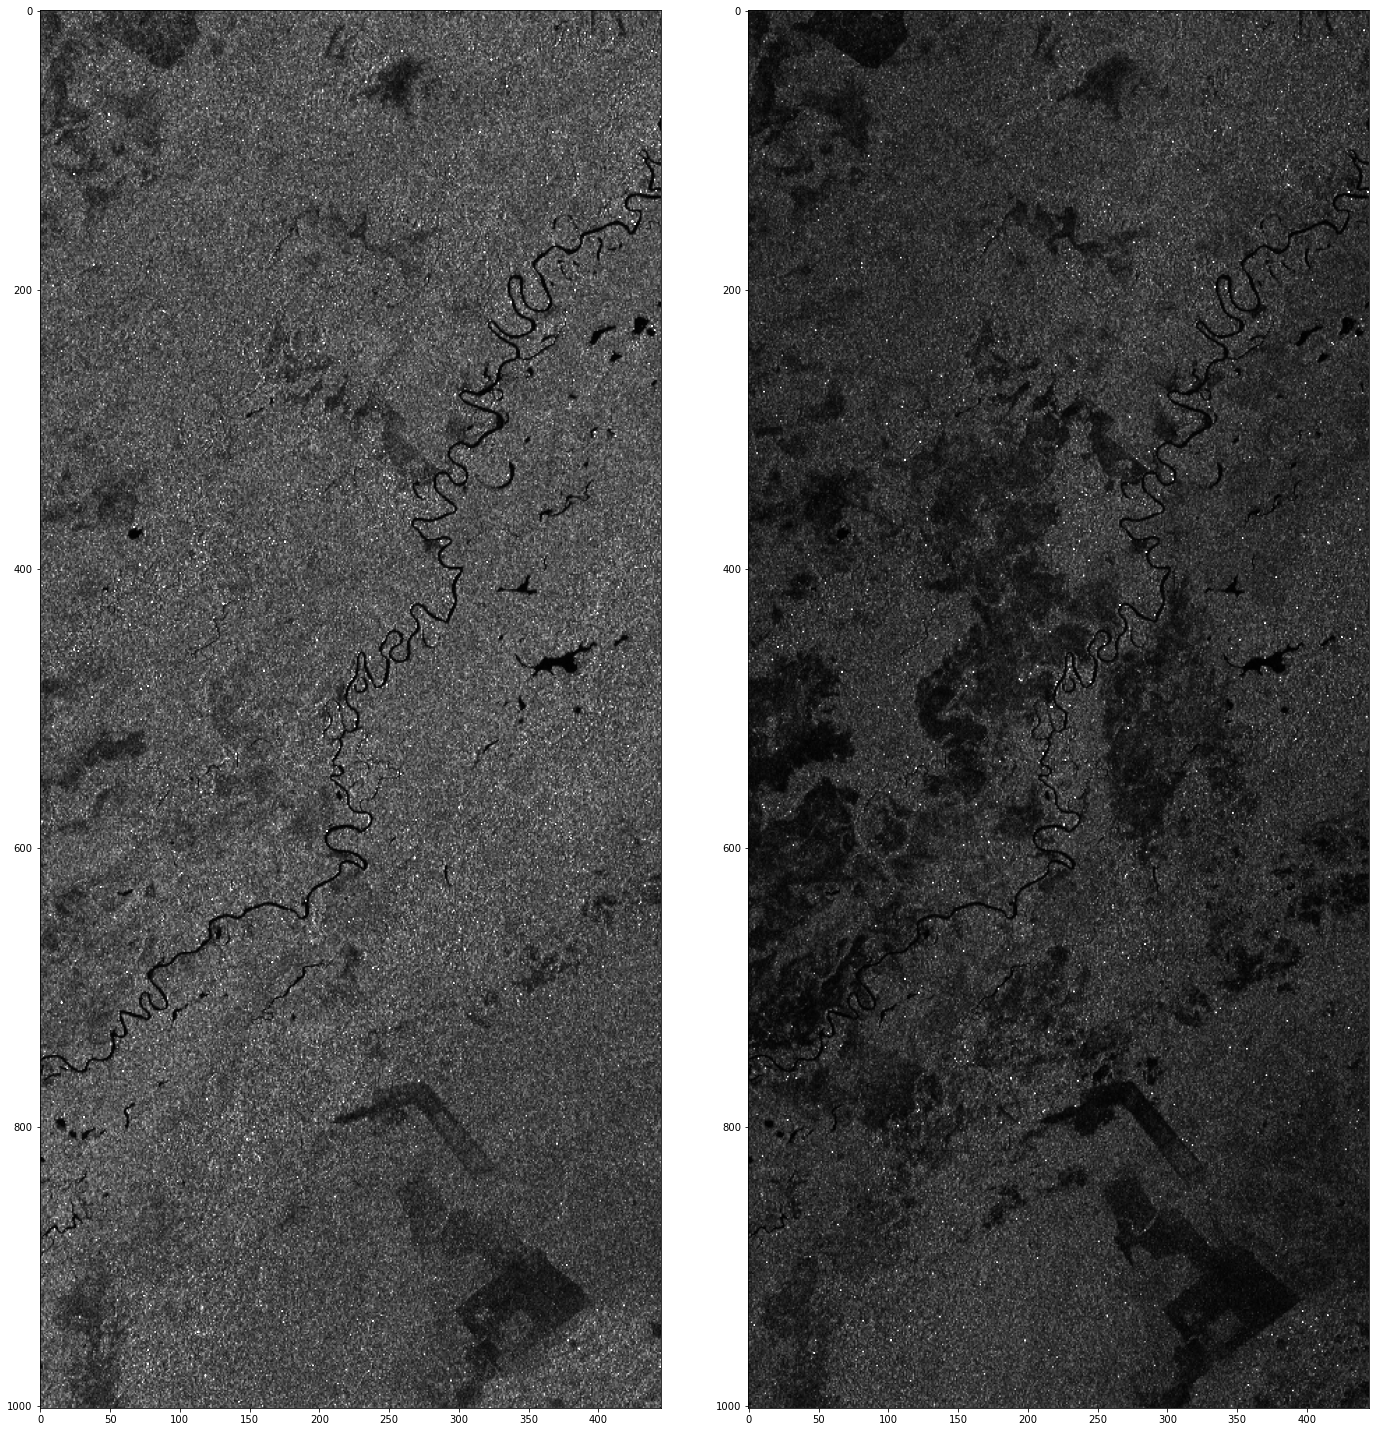

In [2]:
s1Burned1= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200621T091832_20200703T091832.tif'
s1Burned2= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200715T091833_20200727T091834.tif'
s1Burned3= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200808T091834_20200820T091835.tif'
s1Burned4= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200901T091836_20200913T091836.tif'
aoi_bbox = '-56.6,-16.95,-56.4,-16.5'
aoi = [float(coord) for coord in aoi_bbox.split(',')]
img_data1 = vsi_download(s1Burned1, aoi)
img_data3 = vsi_download(s1Burned3, aoi)
layers = []
layers.append(img_data1[:,:,0])
layers.append(img_data3[:,:,1])
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=0.5)

# Changes example in Charpiya

Time series of images available in /data for monitoring of refugee camp construction and flooding

Every geotiff file has one band.

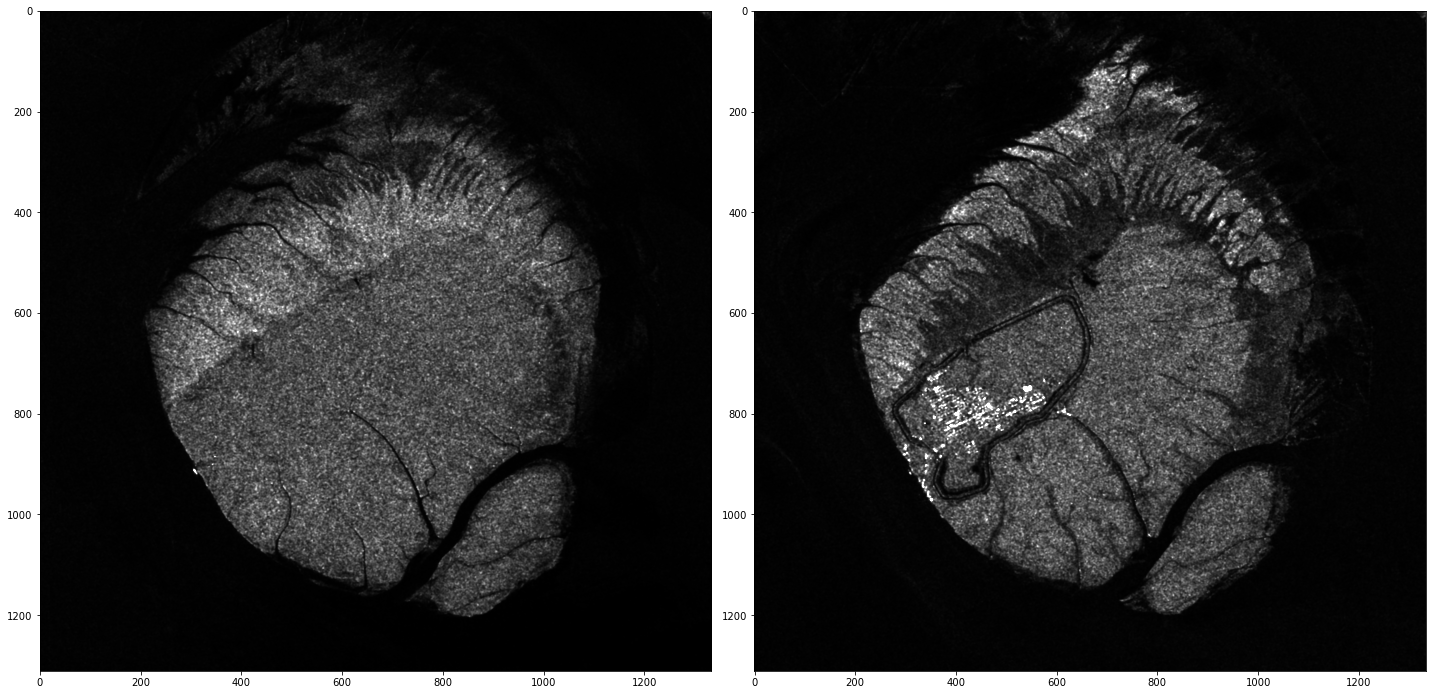

In [3]:
charp_data1=load_image('data/backscatterCharpiya20171220.tif')
charp_data2=load_image('data/backscatterCharpiya20180910.tif')
layers = []
layers.append(charp_data1)
layers.append(charp_data2)
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=0.5)

# Changes example in Niamey

Time series of images available in /data 

Every geotiff file has one band (byte).

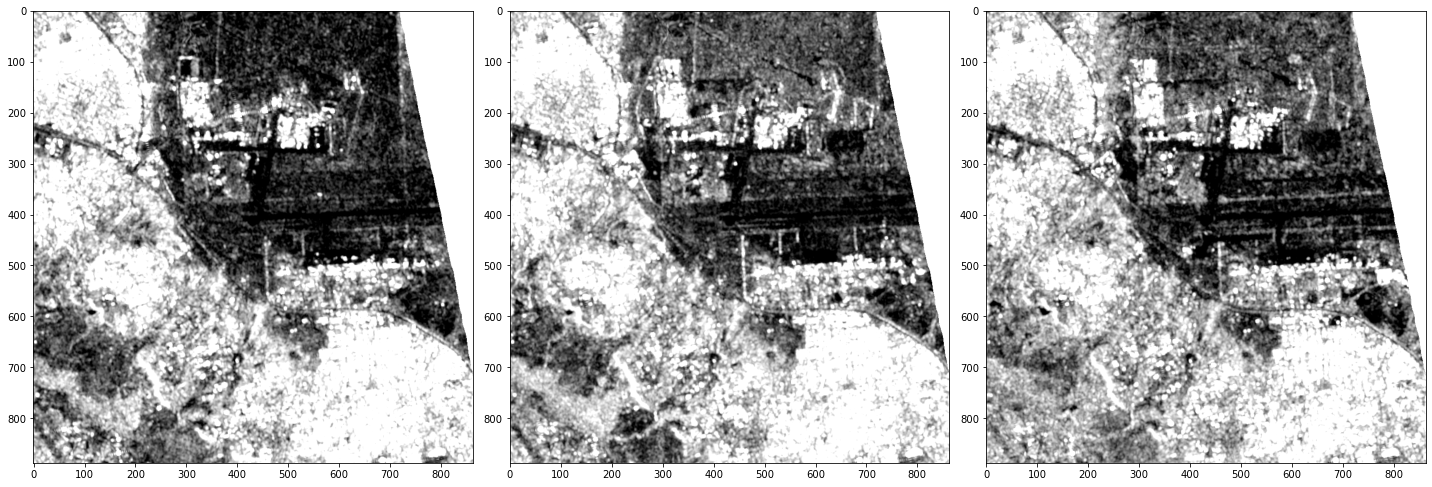

In [4]:
img_data1=load_image('data/backscatterNiamey20180130.tif')
img_data2=load_image('data/backscatterNiamey20180611.tif')
img_data3=load_image('data/backscatterNiamey20180927.tif')
#testScatter(img_data1.flatten(),img_data2.flatten())
layers = []
layers.append(img_data1)
layers.append(img_data2)
layers.append(img_data3)
image = np.dstack(layers)
plot_bands_row(image)


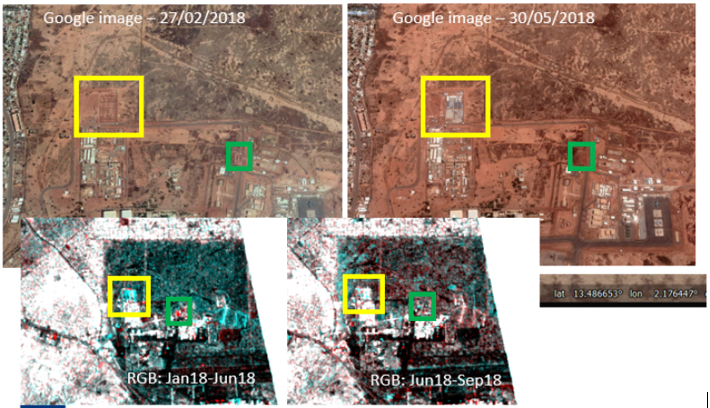

In order to see the  changes, we can visually compare the images before-after the events but it is also possible to highlight the changes with an RGB composite.

Usually it is used the following composite (known as ACD):
* R: Before backscatter
* G: After backscatter
* B: After backscatter

With this order, the colour interpretation is the following:

* Red: Backscatter decreased (e.g. destroyed building, new water bodies)
* Cyan: Backscatter increased (e.g. new building)
* Grey-scale: no changes. 
 * Black: very low backscatter before and after
 * White: very high backscatter before and after

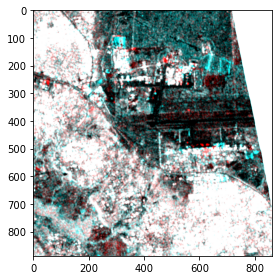

In [6]:
plot_rgb(img_data1,img_data2,img_data2)